# Breast Cancer Detection

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the dataset

In [2]:
data = pd.read_csv("data.csv")
diag = data['diagnosis']
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Computing how many rows and columns in dataset

In [3]:
data.shape

(569, 33)

### Searching for null values in dataset

In [4]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### There are 569 null values in Unnamed: 32 column , So drop the whole column as there is only null values in that column 

In [5]:
data = data.dropna(axis=1)
data.drop('id',axis=1,inplace=True)
print(data.shape)

(569, 31)


### Data Analysis

In [6]:
print(data.describe())
print(data.info())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

### Counting the number of malignant and benign

In [7]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### Visualize the count

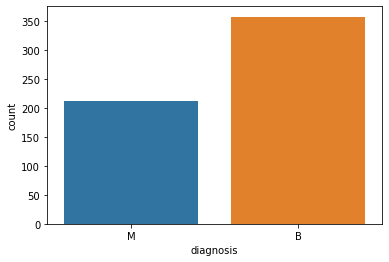

In [8]:
sns.countplot(data["diagnosis"])

### Encoding the data

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,0] = labelencoder.fit_transform(data.iloc[:,0].values)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


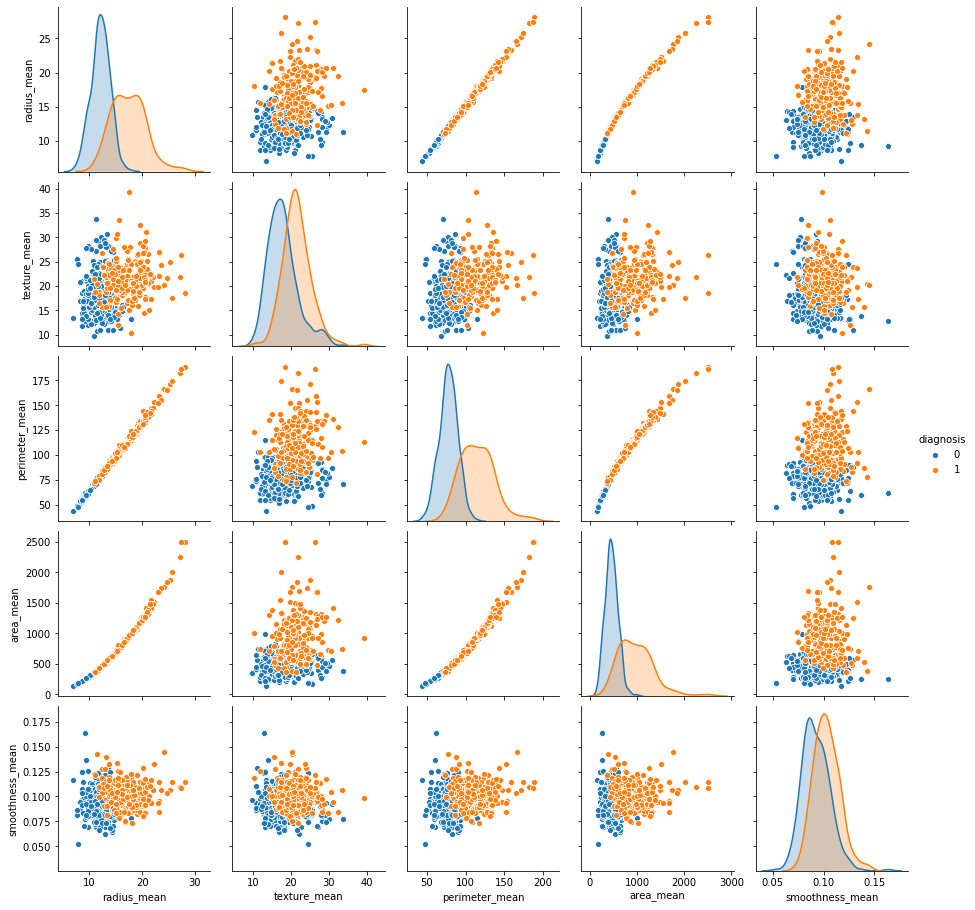

In [10]:
sns.pairplot(data.iloc[:,0:6],hue="diagnosis")

### Feature Selection using Random Forest Classifier

In [11]:
import numpy as np
X = data.iloc[:,1:32]
y = data.iloc[:,0]

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
np.random.seed(6)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)
selected_feat= X.columns[(sel.get_support())]
X = X[selected_feat]
X.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,area_se,radius_worst,perimeter_worst,area_worst,concave points_worst
0,17.99,122.80,1001.0,0.3001,0.14710,153.40,25.38,184.60,2019.0,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,74.08,24.99,158.80,1956.0,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,94.03,23.57,152.50,1709.0,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,27.23,14.91,98.87,567.7,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,94.44,22.54,152.20,1575.0,0.1625


### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pipeline = Pipeline([('normalizer', StandardScaler()),('clf', LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

### Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters.

In [13]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(GaussianNB())
clfs.append(KNeighborsClassifier())
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------
fit_time  mean  0.040291357040405276
fit_time  std  0.06562561179531663
score_time  mean  0.0010007858276367188
score_time  std  5.1810941048033456e-06
test_score  mean  0.9548101265822785
test_score  std  0.00985930913433154
---------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
-----------------------------------
fit_time  mean  0.0037889003753662108
fit_time  std  0.000

In [14]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= LogisticRegression())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False))]

### Trying out different values for parameters solver and regularization Strength 'C' of logistic regression classifier to provide values to a parameter of a step in the pipeline, the syntax is stepname__parameter

In [16]:
cv_grid = GridSearchCV(pipeline,param_grid = { 
    'clf__C' : np.linspace(0.1,0.2,12),  
    'clf__tol' : [0.001,0.001,0.01,0.1]})
cv_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('normalizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
      

In [17]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'normalizer', 'clf', 'normalizer__copy', 'normalizer__with_mean', 'normalizer__with_std', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

### The best combination of the parameters can be accessed from best_params_

In [18]:
cv_grid.best_params_

{'clf__C': 0.1, 'clf__tol': 0.001}

In [19]:
cv_grid.best_estimator_

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [20]:
cv_grid.best_score_

0.9346518987341772

In [22]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 95.906%


In [23]:
print(y_predict)
print()
print(list(y_test))

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [ ]:
import pickle
file = open('Breast_Cancer_Detection.pkl','wb')
pickle.dump(cv_grid,file)

In [ ]:
data.iloc[567,:]

In [ ]:
result = pd.concat([diag, X], axis=1)
result.tail(20)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=1,input_shape=[2])
])

In [8]:
# Setup plotting
import matplotlib.pyplot as plt
from learntools.deep_learning_intro.dltools import animate_sgd
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

from learntools.deep_learning_intro.dltools import animate_sgd

learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)